<a href="https://colab.research.google.com/github/sur-sakthy/computer-vision/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
The provided data has a train/validation split of 1000/500 (approx.) images. In this task you are to select any 4 classes from the original ImageNette data as your working dataset (i.e. classification whereby you are predicting one of four possible classes).

Additionally, you need to reorganise the data into appropriate train/validation/test split before you train your network models. The details of the splitting is left to you, but you must fully justify any final split used in your evaluation.

In [1]:
!cp '/content/drive/MyDrive/EE544 Computer Vision/imagenette2-160.tgz' ./

In [ ]:
!tar zxvf /content/imagenette2-160.tgz

In [18]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, AUC, Recall
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [4]:
PATH_TO_TRAIN_DATA = '/content/imagenette2-160/train'
PATH_TO_VAL_DATA = '/content/imagenette2-160/val'
IMG_WIDTH=64
IMG_HEIGHT=64

In [5]:
all_classes = os.listdir(PATH_TO_TRAIN_DATA)
all_classes

['n03445777',
 'n03417042',
 'n02979186',
 'n03028079',
 'n03394916',
 'n03425413',
 'n03888257',
 '.DS_Store',
 'n02102040',
 'n03000684',
 'n01440764']

In [6]:
all_classes = os.listdir(PATH_TO_VAL_DATA)
all_classes

['n03445777',
 'n03417042',
 'n02979186',
 'n03028079',
 'n03394916',
 'n03425413',
 'n03888257',
 'n02102040',
 'n03000684',
 'n01440764']

In [7]:
img_data_array = []
class_name = []

In [8]:
def load_dataset(img_folder): 
    for dir in os.listdir(img_folder):
      if dir == 'n03445777' or dir == 'n03417042' or dir == 'n02979186' or dir == 'n03028079' :
        for file in os.listdir(os.path.join(img_folder, dir)):
       
            image_path = os.path.join(img_folder, dir, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir)

In [9]:
load_dataset(PATH_TO_TRAIN_DATA)
load_dataset(PATH_TO_VAL_DATA)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(img_data_array, class_name, test_size=0.30, random_state=42)

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [12]:
target_dict = { k: v for v, k in enumerate(np.unique(y_train)) }
target_dict

{'n02979186': 0, 'n03028079': 1, 'n03417042': 2, 'n03445777': 3}

In [13]:
def get_target_val(target_dict, target_data):
  return [ target_dict[target_data[i]] for i in range(len(target_data)) ]

In [14]:
def build_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(64,64,3)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Dense(1, activation='softmax'))

  model.compile(
      optimizer=Adam(),
      loss='categorical_crossentropy',
      metrics=[
          CategoricalAccuracy(),
          Precision(), 
          Recall(),
          AUC()
        ]
  )

  return model

In [15]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [ ]:
history = model.fit(
    x=tf.cast(np.array(X_train), tf.float64), 
    y=tf.cast(list(map(int, get_target_val(target_dict, y_train))), tf.int32), 
    epochs=2,
    validation_data=(
        tf.cast(np.array(X_val), tf.float64), 
        tf.cast(list(map(int, get_target_val(target_dict, y_val))), tf.int32)
    )
)

Epoch 1/2
119/119 [==============================] - 92s 758ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.7444 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000 - val_precision: 0.7776 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/2
119/119 [==============================] - 84s 704ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.7444 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000 - val_precision: 0.7776 - val_recall: 1.0000 - val_auc: 0.5000


In [25]:
model.save_weights('/content/drive/MyDrive/EE544 Computer Vision/task #1.h5')

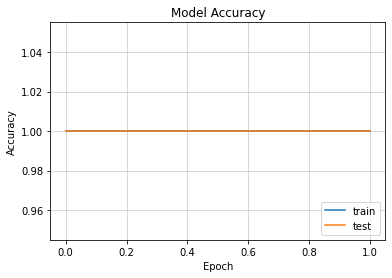

In [23]:
# Plot the train accuracy and validation accuracy on the same plot using matplotlob
plt.plot(history.history['categorical_accuracy']) 
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right') 
plt.grid(linestyle='-', linewidth=0.5)